In [1]:
import streamlit as st
import jsonlines
import random
import pandas as pd
import json
import fileinput
import numpy as np
from pprint import pprint

2022-05-29 17:44:46.356 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [2]:
#Importing Dataset
olafScholzJsonLines = jsonlines.open("OlafScholz.jl")

olafScholzTwitter = pd.read_json("OlafScholz.jl", lines = True)
print("Datensatzlänge: " + str(olafScholzTwitter.info()))

print(olafScholzTwitter.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   http_status   65 non-null     int64 
 1   account_name  65 non-null     object
 2   account_data  65 non-null     object
 3   params        65 non-null     object
 4   response      65 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.7+ KB
Datensatzlänge: None
   http_status account_name  \
0          200   OlafScholz   
1          200   OlafScholz   
2          200   OlafScholz   
3          200   OlafScholz   
4          200   OlafScholz   

                                        account_data  \
0  {'Name': 'Scholz, Olaf', 'Partei': 'SPD', 'id'...   
1  {'Name': 'Scholz, Olaf', 'Partei': 'SPD', 'id'...   
2  {'Name': 'Scholz, Olaf', 'Partei': 'SPD', 'id'...   
3  {'Name': 'Scholz, Olaf', 'Partei': 'SPD', 'id'...   
4  {'Name': 'Scholz, Olaf', 'Partei': 'SPD', 'id'...   

         

In [3]:
"""
print("Response Metadaten: " + str(olafScholzTwitter["response"][0].keys()))
print(olafScholzTwitter["params"][0].keys())
for Key in ResponseKeys:
    print(type(olafScholzTwitter["response"][0][Key]))
    #print("{}-Metadaten: ".format(Key) + str(olafScholzTwitter["response"][0][Key]))
"""

'\nprint("Response Metadaten: " + str(olafScholzTwitter["response"][0].keys()))\nprint(olafScholzTwitter["params"][0].keys())\nfor Key in ResponseKeys:\n    print(type(olafScholzTwitter["response"][0][Key]))\n    #print("{}-Metadaten: ".format(Key) + str(olafScholzTwitter["response"][0][Key]))\n'

In [4]:
#print(olafScholzTwitter["response"][0].len)
#print("---")
#Starting to investigate Dataset
#print(olafScholzTwitter.describe())
#print(type(olafScholzTwitter))
#print(olafScholzTwitter.keys())
#for key in olafScholzTwitter:
#print("{} : {}".format(key, olafScholzTwitter[key]))
#print("{}".format(key) + str(type(olafScholzTwitter[key])))
    

In [5]:
"""
for line in olafScholzJsonLines:
    #print(line)
    
    keyResponse = line["response"]
    print("Response-Type:" + str(type(keyResponse)))
    print("Response-Keys:" + str(keyResponse.keys()))
    
    for key in keyResponse:
        print(type(keyResponse[key]))
        #pprint(keyResponse[key])
        #print("{}-Metadaten: ".format(key) + str(keyResponse[key].keys()))
    print("Includes-Metadaten: " + str(keyResponse["includes"].keys())+ "\n")
 
    print("Includes-Keys:" + str(keyResponse["includes"]["users"][0].keys())+"\n")
    #pprint("Example Includes:" +"\n" + str(keyResponse["includes"]["users"])+"\n")
        
    print("Meta-Metadaten: " + str(keyResponse["meta"].keys())+ "\n")
    data = keyResponse["data"]
    print("Type-Data: " + str(type(data))+ "\n")
    print(str(data[0]) + "\n")
    print("Type-Data[0]: " + str(type(data[0])) + "\n")
    print("data[0].keys(): " + str(data[0].keys()) + "\n")
    #print(dir(data[0].keys()))
    print("len(data[0].keys()): " + str(len(data[0].keys())) + "\n")
    break
"""

'\nfor line in olafScholzJsonLines:\n    #print(line)\n    \n    keyResponse = line["response"]\n    print("Response-Type:" + str(type(keyResponse)))\n    print("Response-Keys:" + str(keyResponse.keys()))\n    \n    for key in keyResponse:\n        print(type(keyResponse[key]))\n        #pprint(keyResponse[key])\n        #print("{}-Metadaten: ".format(key) + str(keyResponse[key].keys()))\n    print("Includes-Metadaten: " + str(keyResponse["includes"].keys())+ "\n")\n \n    print("Includes-Keys:" + str(keyResponse["includes"]["users"][0].keys())+"\n")\n    #pprint("Example Includes:" +"\n" + str(keyResponse["includes"]["users"])+"\n")\n        \n    print("Meta-Metadaten: " + str(keyResponse["meta"].keys())+ "\n")\n    data = keyResponse["data"]\n    print("Type-Data: " + str(type(data))+ "\n")\n    print(str(data[0]) + "\n")\n    print("Type-Data[0]: " + str(type(data[0])) + "\n")\n    print("data[0].keys(): " + str(data[0].keys()) + "\n")\n    #print(dir(data[0].keys()))\n    print("l

In [6]:
# Reply Dataframe
# Importing Data into final Dataframe for ML
replyDataFrame = pd.DataFrame(columns = ["target", "tweetid", "date", "time", "user", "text"])
print(replyDataFrame.head())
#dir(replyDataFrame)
iterator = 0

for line in olafScholzJsonLines:
    keyResponse = line["response"]
    data = keyResponse["data"]
    #print("Iterator {} has length: ".format(iterator) + str(len(data)))
    #pprint(data)
    #["target", "ids", "date", "flag", "user", "text"]
    newDataRow = [None, None, None, None, None, None]
    #print(line.keys())
    userName = line["account_name"]
    #print("User Name: " + str(line["account_name"])+"\n")
    newDataRow[4] = userName
    keyResponse = line["response"]
    data = keyResponse["data"]


    for tweet in data:
        #print("Tweet-ID: " + tweet["id"])
        #print(str(tweet) + "\n")
        tweetTarget = 1
       
        tweetID = tweet["id"]
        authorID = tweet["author_id"]
        tweetDate = tweet["created_at"][0:10]
        tweetTime = tweet["created_at"][11:19]
        #tweetFlag = "NO_QUERY"
        tweetText = tweet["text"]
        #tweetAuthor = tweet["context_annotations"]
        #tweetAuthor = tweet["context_annotations"]
        #tweetAuthor = userName
        #print(type(tweetAuthor))
        
        newDataRow[0] = tweetTarget
        newDataRow[1] = tweetID
        newDataRow[2] = tweetDate
        newDataRow[3] = tweetTime
        #newDataRow[4] = tweetFlag
        newDataRow[4] = authorID
        newDataRow[5] = tweetText
        #newDataRow[4] = tweetAuthor
        #pprint(newDataRow)
        replyDataFrame.loc[len(replyDataFrame)] = newDataRow
        #tempDataFrame = pd.DataFrame(newDataRow, columns["target", "ids", "date", "flag", "user", "text"])
        #replyDataFrame = replyDataFrame.append(tempDataFame, ignore_index = True)
        #replyDataFrame = replyDataFrame.append(pd.DataFrame(newDataRow, columns = ["target", "ids", "date", "flag", "user", "text"]),ignore_index = True)
        #break
    #print("{} Finale Dataframe \n".format(iterator) + str(replyDataFrame.head()))
    iterator += 1


Empty DataFrame
Columns: [target, tweetid, date, time, user, text]
Index: []


In [7]:
#print(dir(replyDataFrame))
print(len(replyDataFrame))
print(replyDataFrame.shape)
print(replyDataFrame.head())

6419
(6419, 6)
  target              tweetid        date      time      user  \
0      1  1515588838562971650  2022-04-17  07:11:52  38150247   
1      1  1514644785818058757  2022-04-14  16:40:32  38150247   
2      1  1514291545742184451  2022-04-13  17:16:53  38150247   
3      1  1514256817613905929  2022-04-13  14:58:53  38150247   
4      1  1513955069867274245  2022-04-12  18:59:51  38150247   

                                                text  
0  RT @Bundeskanzler: Ich wünsche Ihnen und Ihren...  
1  RT @Bundeskanzler: Meine Solidarität gilt @Kar...  
2  RT @Bundeskanzler: Sie haben Hilfe organisiert...  
3  RT @Bundeskanzler: Verantwortung übernehmen he...  
4  RT @Bundeskanzler: Die Sanktionen gegen #Russl...  


In [8]:
#print(replyDataFrame.query("date < '2022-01-01'").head())
#print(replyDataFrame.query("date < '2022-01-01'").count())
#print(replyDataFrame.query("text"[0:18] == "RT @Bundeskanzler:").head())
print("----")
#mask = replyDataFrame["text"].str.contains("RT @Bundeskanzler:").head()
#print(replyDataFrame[mask].head())
#print(replyDataFrame[replyDataFrame["text"].str.contains("RT @Bundeskanzler:")].head())
#print(replyDataFrame[replyDataFrame["text"].str.contains("RT @Bundeskanzler:")].count())
print(replyDataFrame[replyDataFrame["text"].str.contains("RT @Bundeskanzler:")].sort_values("date",ascending = "true").head())
# -> Proven that first Retweet was after 2022-02-14

----
   target              tweetid        date      time      user  \
53      1  1493195813245313024  2022-02-14  12:09:58  38150247   
52      1  1493599012691365903  2022-02-15  14:52:09  38150247   
51      1  1493602211829587986  2022-02-15  15:04:51  38150247   
50      1  1494003008283287560  2022-02-16  17:37:29  38150247   
49      1  1494245849085493251  2022-02-17  09:42:26  38150247   

                                                 text  
53  RT @Bundeskanzler: Auf dem Weg in die #Ukraine...  
52  RT @Bundeskanzler: Der Frieden und die Sicherh...  
51  RT @Bundeskanzler: Ich habe Präsident #Putin i...  
50  RT @Bundeskanzler: Die #Corona-Regeln zeigen d...  
49  RT @Bundeskanzler: Gestern Abend habe ich mit ...  


In [9]:
#testing
print(replyDataFrame["text"].str.contains("RT @Bundeskanzler").head())
print(replyDataFrame["text"].str.contains("RT @Bundeskanzler").count())

0    True
1    True
2    True
3    True
4    True
Name: text, dtype: bool
6419


In [10]:
#cleansedTweetDF = replyDataFrame[replyDataFrame["text"].str.contains("RT @Bundeskanzler:") or replyDataFrame["text"].str.contains("!RT @") ]
print("Size of dataframe :\n"+ str(replyDataFrame.count())+"\n----")
maskBundesKanz = replyDataFrame["text"].str.contains("RT @Bundeskanzler:")
maskNoRT = replyDataFrame["text"].str.contains("RT @")==False
print("Size of dataframe with RT @Bundeskanzler:\n" + str(replyDataFrame[maskBundesKanz].count())+"\n----")
print("Size of dataframe without RT @:\n" + str(replyDataFrame[maskNoRT].count())+"\n----")
#cleansedTweetDF contains all Tweets posted directly by Olaf before or after being Kanzler
cleansedTweetDF = replyDataFrame[maskBundesKanz | maskNoRT]
print("Size of cleansedTweetDF @:\n" + str(cleansedTweetDF.count())+"\n----")
print(cleansedTweetDF.head())
#cleansedTweetDF has "RT @Bundeskanzler:" still in the tweet. To not have any issues with ML we removed that part of the Tweet in the following parts

Size of dataframe :
target     6419
tweetid    6419
date       6419
time       6419
user       6419
text       6419
dtype: int64
----
Size of dataframe with RT @Bundeskanzler:
target     48
tweetid    48
date       48
time       48
user       48
text       48
dtype: int64
----
Size of dataframe without RT @:
target     4071
tweetid    4071
date       4071
time       4071
user       4071
text       4071
dtype: int64
----
Size of cleansedTweetDF @:
target     4119
tweetid    4119
date       4119
time       4119
user       4119
text       4119
dtype: int64
----
  target              tweetid        date      time      user  \
0      1  1515588838562971650  2022-04-17  07:11:52  38150247   
1      1  1514644785818058757  2022-04-14  16:40:32  38150247   
2      1  1514291545742184451  2022-04-13  17:16:53  38150247   
3      1  1514256817613905929  2022-04-13  14:58:53  38150247   
4      1  1513955069867274245  2022-04-12  18:59:51  38150247   

                                            

In [11]:
# Removing the Text \"RT @Bundeskanzler:\" from the text\n
print("ReplyDataframe: \n" + str(replyDataFrame[maskBundesKanz].count()))
cleansedAtBundKanzDF = replyDataFrame[maskBundesKanz].copy()
#print(str(cleansedAtBundKanzDF[\"text\"]))
cleansedAtBundKanzDF.text = cleansedAtBundKanzDF.text.str.strip("RT @Bundeskanzler: ")
print(cleansedAtBundKanzDF.head())
                                                                

ReplyDataframe: 
target     48
tweetid    48
date       48
time       48
user       48
text       48
dtype: int64
  target              tweetid        date      time      user  \
0      1  1515588838562971650  2022-04-17  07:11:52  38150247   
1      1  1514644785818058757  2022-04-14  16:40:32  38150247   
2      1  1514291545742184451  2022-04-13  17:16:53  38150247   
3      1  1514256817613905929  2022-04-13  14:58:53  38150247   
4      1  1513955069867274245  2022-04-12  18:59:51  38150247   

                                                text  
0  Ich wünsche Ihnen und Ihren Familien frohe #Os...  
1  Meine Solidarität gilt @Karl_Lauterbach: Jeder...  
2  Sie haben Hilfe organisiert, Kräfte gebündelt ...  
3  Verantwortung übernehmen heißt: Deutschland li...  
4  Die Sanktionen gegen #Russland sind notwendig ...  


In [12]:
#appending the sliced versions to the Dataframe and resulting in the expected 4119 Tweets
cleansedTweetDFShort = replyDataFrame[maskNoRT].append(cleansedAtBundKanzDF)
print(cleansedTweetDFShort.count())
print(cleansedTweetDFShort.sort_values("date",ascending = False).head())

target     4119
tweetid    4119
date       4119
time       4119
user       4119
text       4119
dtype: int64
  target              tweetid        date      time      user  \
0      1  1515588838562971650  2022-04-17  07:11:52  38150247   
1      1  1514644785818058757  2022-04-14  16:40:32  38150247   
2      1  1514291545742184451  2022-04-13  17:16:53  38150247   
3      1  1514256817613905929  2022-04-13  14:58:53  38150247   
4      1  1513955069867274245  2022-04-12  18:59:51  38150247   

                                                text  
0  Ich wünsche Ihnen und Ihren Familien frohe #Os...  
1  Meine Solidarität gilt @Karl_Lauterbach: Jeder...  
2  Sie haben Hilfe organisiert, Kräfte gebündelt ...  
3  Verantwortung übernehmen heißt: Deutschland li...  
4  Die Sanktionen gegen #Russland sind notwendig ...  


In [13]:
# Tobias und Thies 29.05.22

# Starting preparing for machine learning

# Making statement text in lower case

cleanNew = cleansedTweetDFShort

cleansedTweetDFShort['text']=cleansedTweetDFShort['text'].str.lower()
cleansedTweetDFShort['text'].tail()

49    gestern abend habe ich mit @potus biden zur si...
50    die #corona-regeln zeigen die erhoffte wirkung...
51    ich habe präsident #putin in moskau verdeutlic...
52    der frieden und die sicherheit in europa sind ...
53    auf dem weg in die #ukraine. heute in kiew und...
Name: text, dtype: object

In [14]:
# Defining set containing all stopwords in German. (Stopwords: Word with no relevance for analysis)
# Source for Stopwordlist: https://github.com/stopwords-iso/stopwords-de/blob/master/stopwords-de.json
# Cleaning text from stopwords
with open('stopwords-de.json','r') as file:
    stopwordlistgerman = json.load(file)

STOPWORDS = set(stopwordlistgerman)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(lambda text: cleaning_stopwords(text))
cleansedTweetDFShort['text'].head(10)

12    saarländerinnen saarländer klar wechsel spitze...
21    persönliche position längst bekannt: zeitlich ...
54    freue mich, @bundeskanzler folgt - alles, regi...
55    aktuelle welle pandemie anlass zuversicht: wis...
56    #corona-pandemie flutkatastrophe sommer gezeig...
57    everyone can be absolutely sure that germany s...
60    stärke westlichen antwort lage russisch-ukrain...
61    verhindern, welle nächste folgt, virusvariante...
62    lage grenze #ukraine ernst. klar ist: territor...
64    #kusel passiert ist, bedrückt sehr. mitgefühl ...
Name: text, dtype: object

In [15]:
# Cleaning text from english stopwords
# Source for Stopwordlist: https://countwordsfree.com/stopwords
# Cleaning text from stopwords
with open('stop_words_english.json','r') as file:
    stopwordlistenglish = json.load(file)

STOPWORDS = set(stopwordlistenglish)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(lambda text: cleaning_stopwords(text))
cleansedTweetDFShort['text'].head(10)

12    saarländerinnen saarländer klar wechsel spitze...
21    persönliche position längst bekannt: zeitlich ...
54    freue mich, @bundeskanzler folgt - alles, regi...
55    aktuelle welle pandemie anlass zuversicht: wis...
56    #corona-pandemie flutkatastrophe sommer gezeig...
57    absolutely germany stands allies united russia...
60    stärke westlichen antwort lage russisch-ukrain...
61    verhindern, welle nächste folgt, virusvariante...
62    lage grenze #ukraine ernst. klar ist: territor...
64    #kusel passiert ist, bedrückt sehr. mitgefühl ...
Name: text, dtype: object

In [16]:
# Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
cleansedTweetDFShort['text']= cleansedTweetDFShort['text'].apply(lambda x: cleaning_punctuations(x))
cleansedTweetDFShort['text'].head(10)

12    saarländerinnen saarländer klar wechsel spitze...
21    persönliche position längst bekannt zeitlich b...
54    freue mich bundeskanzler folgt  alles regierun...
55    aktuelle welle pandemie anlass zuversicht wiss...
56    coronapandemie flutkatastrophe sommer gezeigt ...
57    absolutely germany stands allies united russia...
60    stärke westlichen antwort lage russischukraini...
61    verhindern welle nächste folgt virusvarianten ...
62    lage grenze ukraine ernst klar ist territorial...
64    kusel passiert ist bedrückt sehr mitgefühl gil...
Name: text, dtype: object

In [17]:
# Cleaning and removing characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(lambda x: cleaning_repeating_char(x))
cleansedTweetDFShort['text'].head(10)

12    saarländerinnen saarländer klar wechsel spitze...
21    persönliche position längst bekannt zeitlich b...
54    freue mich bundeskanzler folgt  alles regierun...
55    aktuelle welle pandemie anlass zuversicht wiss...
56    coronapandemie flutkatastrophe sommer gezeigt ...
57    absolutely germany stands allies united russia...
60    stärke westlichen antwort lage russischukraini...
61    verhindern welle nächste folgt virusvarianten ...
62    lage grenze ukraine ernst klar ist territorial...
64    kusel passiert ist bedrückt sehr mitgefühl gil...
Name: text, dtype: object

In [18]:
# Cleaning and removing URL’s

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))','',data)
cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(lambda x: cleaning_URLs(x))
cleansedTweetDFShort['text'].head(10)

12    saarländerinnen saarländer klar wechsel spitze...
21    persönliche position längst bekannt zeitlich b...
54    freue mich bundeskanzler folgt  alles regierun...
55    aktuelle welle pandemie anlass zuversicht wiss...
56    coronapandemie flutkatastrophe sommer gezeigt ...
57    absolutely germany stands allies united russia...
60    stärke westlichen antwort lage russischukraini...
61    verhindern welle nächste folgt virusvarianten ...
62    lage grenze ukraine ernst klar ist territorial...
64    kusel passiert ist bedrückt sehr mitgefühl gil...
Name: text, dtype: object

In [19]:
# Cleaning and removing @

def cleaning_URLs(data):
    return re.sub('@','',data)
cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(lambda x: cleaning_URLs(x))
cleansedTweetDFShort['text'].head(10)

12    saarländerinnen saarländer klar wechsel spitze...
21    persönliche position längst bekannt zeitlich b...
54    freue mich bundeskanzler folgt  alles regierun...
55    aktuelle welle pandemie anlass zuversicht wiss...
56    coronapandemie flutkatastrophe sommer gezeigt ...
57    absolutely germany stands allies united russia...
60    stärke westlichen antwort lage russischukraini...
61    verhindern welle nächste folgt virusvarianten ...
62    lage grenze ukraine ernst klar ist territorial...
64    kusel passiert ist bedrückt sehr mitgefühl gil...
Name: text, dtype: object

In [20]:
# Cleaning and removing numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(lambda x: cleaning_numbers(x))
cleansedTweetDFShort['text'].head(10)

12    saarländerinnen saarländer klar wechsel spitze...
21    persönliche position längst bekannt zeitlich b...
54    freue mich bundeskanzler folgt  alles regierun...
55    aktuelle welle pandemie anlass zuversicht wiss...
56    coronapandemie flutkatastrophe sommer gezeigt ...
57    absolutely germany stands allies united russia...
60    stärke westlichen antwort lage russischukraini...
61    verhindern welle nächste folgt virusvarianten ...
62    lage grenze ukraine ernst klar ist territorial...
64    kusel passiert ist bedrückt sehr mitgefühl gil...
Name: text, dtype: object

In [21]:
# Getting tokenization of tweet text

from nltk.tokenize import RegexpTokenizer
tk = RegexpTokenizer('\s+', gaps = True)

cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(tk.tokenize)
cleansedTweetDFShort['text'].head()

12    [saarländerinnen, saarländer, klar, wechsel, s...
21    [persönliche, position, längst, bekannt, zeitl...
54    [freue, mich, bundeskanzler, folgt, alles, reg...
55    [aktuelle, welle, pandemie, anlass, zuversicht...
56    [coronapandemie, flutkatastrophe, sommer, geze...
Name: text, dtype: object

In [22]:
# Applying Stemming

import nltk

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
cleansedTweetDFShort['text']= cleansedTweetDFShort['text'].apply(lambda x: stemming_on_text(x))
cleansedTweetDFShort['text'].head()

12    [saarländerinnen, saarländer, klar, wechsel, s...
21    [persönliche, position, längst, bekannt, zeitl...
54    [freue, mich, bundeskanzler, folgt, alles, reg...
55    [aktuelle, welle, pandemie, anlass, zuversicht...
56    [coronapandemie, flutkatastrophe, sommer, geze...
Name: text, dtype: object

In [23]:
# Applying Lemmatizer

from nltk.stem import WordNetLemmatizer
#import nltk
#nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
cleansedTweetDFShort['text'] = cleansedTweetDFShort['text'].apply(lambda x: lemmatizer_on_text(x))
cleansedTweetDFShort['text'].head()

12    [saarländerinnen, saarländer, klar, wechsel, s...
21    [persönliche, position, längst, bekannt, zeitl...
54    [freue, mich, bundeskanzler, folgt, alles, reg...
55    [aktuelle, welle, pandemie, anlass, zuversicht...
56    [coronapandemie, flutkatastrophe, sommer, geze...
Name: text, dtype: object

In [24]:
cleansedTweetDFShort

,target,tweetid,date,time,user,text
12,1,1508125473842335749,2022-03-27,16:55:07,38150247,"[saarländerinnen, saarländer, klar, wechsel, s..."
21,1,1504398354565976070,2022-03-17,10:04:52,38150247,"[persönliche, position, längst, bekannt, zeitl..."
54,1,1492872048120668161,2022-02-13,14:43:27,38150247,"[freue, mich, bundeskanzler, folgt, alles, reg..."
55,1,1492074452796022791,2022-02-11,09:54:05,38150247,"[aktuelle, welle, pandemie, anlass, zuversicht..."
56,1,1492074451432873985,2022-02-11,09:54:05,38150247,"[coronapandemie, flutkatastrophe, sommer, geze..."
...,...,...,...,...,...,...
49,1,1494245849085493251,2022-02-17,09:42:26,38150247,"[gestern, abend, potus, biden, situation, ukra..."
50,1,1494003008283287560,2022-02-16,17:37:29,38150247,"[coronaregeln, zeigen, erhoffte, wirkung, infe..."
51,1,1493602211829587986,2022-02-15,15:04:51,38150247,"[präsident, putin, moskau, verdeutlicht, deuts..."
52,1,1493599012691365903,2022-02-15,14:52:09,38150247,"[frieden, sicherheit, europa, hohes, gut, lage..."


In [25]:
# Creating extra Dataframe 

textdata=cleansedTweetDFShort[['target','text']]
textdata = textdata.astype({'target':'int'})
textdata = textdata.astype({'text':'string'})

textdata['target'].unique()
print(textdata.dtypes)
textdata.head()

target     int64
text      string
dtype: object


,target,text
12,1,"['saarländerinnen', 'saarländer', 'klar', 'wec..."
21,1,"['persönliche', 'position', 'längst', 'bekannt..."
54,1,"['freue', 'mich', 'bundeskanzler', 'folgt', 'a..."
55,1,"['aktuelle', 'welle', 'pandemie', 'anlass', 'z..."
56,1,"['coronapandemie', 'flutkatastrophe', 'sommer'..."


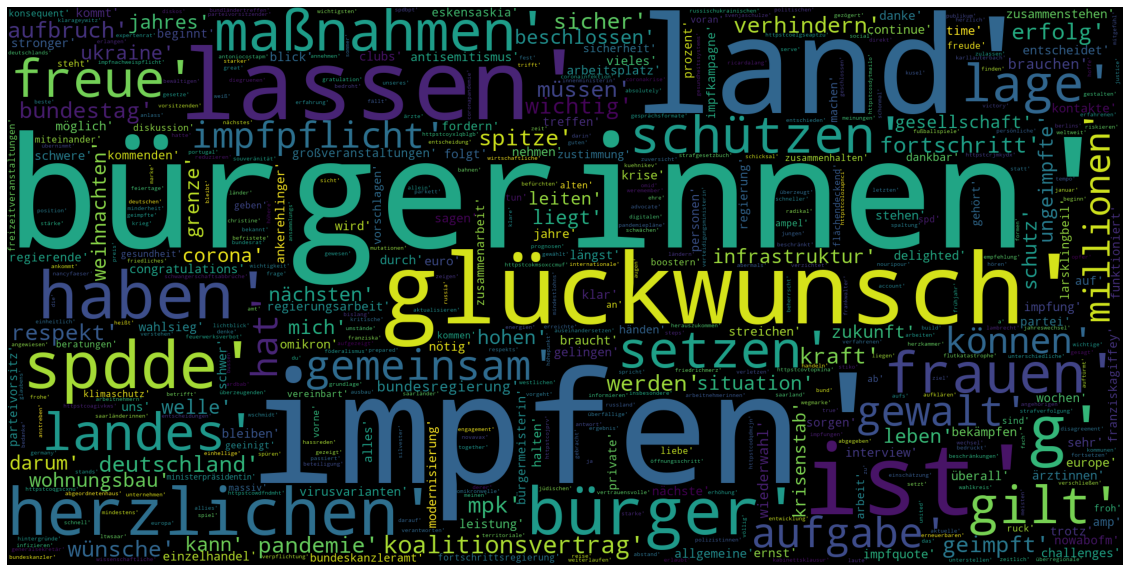

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

textdata = textdata['text'][:80]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 2000 , height = 1000,
               collocations=False).generate(" ".join(textdata))
plt.axis("off")
plt.imshow(wc)